- Class Methods: 
    - `IBMProvider.save_account(TOKEN, INSTANCE)`: Save your account to disk for future use and optionally set a default hub/group/project to be used when loading your account.
    - `IBMProvider.saved_accounts()`: View the accounts saved to disk.
    - `IBMProvider.delete_account()`: Delete the saved account from disk.
    - `IBMProvider.active_account()`: List the account currently active in the session.

- Constructor Usage: 
    - `IBMProvider()`: Load account and default hub/group/project using saved credentials.
    - `IBMProvider(TOKEN)`: Enable your account in the current session.

In [8]:
from qiskit_ibm_provider import IBMProvider
#IBMProvider.save_account('5ab66cd482d76c8f33.................2e22d22700ef2b93be5025055692', overwrite=True)
provider = IBMProvider()
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_perth')>]

- `backends()`: Returns all backends available to the account.

- `get_backend(NAME)`: Returns the named backend.

In [9]:
back = provider.get_backend("ibm_nairobi")
back

<IBMBackend('ibm_nairobi')>

# Filtering the Backends

- The below filters can be combined as desired.

In [10]:
provider.backends(simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>]

In [11]:
provider.backends(min_num_qubits=5, simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>]

In [12]:
from qiskit_ibm_provider import least_busy

small_devices = provider.backends(min_num_qubits=5, simulator=False, operational=True)
backend = least_busy(small_devices)
print(backend)

<IBMBackend('ibm_brisbane')>


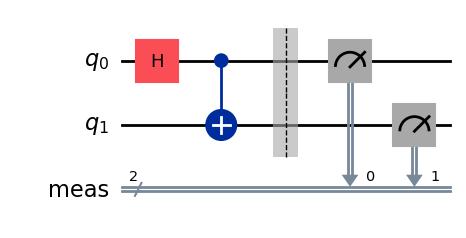

In [18]:
from qiskit import *

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Drwaing the circuit in a clifford style (default)
# qc.draw(style="clifford", output="mpl")

# Drawing the circuit in a transpiled style or a iqp style
qc.draw(style="iqp", output="mpl")

----------------------------------------------------------------------------------

### Backends
    - Backends represent either a simulator or a real quantum computer, and are responsible for running quantum circuits and/or pulse schedules and returning results. They have a run method which takes in one or more circuits as input, the Qiskit API serialization format, and returns a BaseJob object. This object allows asynchronous running of jobs for retrieving results from a backend when the job is completed.

At a minimum, backends use the following methods, inherited from `qiskit.providers.backend.BackendV1`:

`provider`: Returns the instance of IBMProvider class used to access the backend.

`name`: Returns the name of the backend.

`status()`: Returns the current status of the backend.

`configuration()`: Returns the backend configuration.

`properties()`: Returns the backend properties.

`run(circuit, **kwargs)`: Runs a circuit on the backend.

#### IBMBackend also accepts additional parameters to the `run()` method:

`job_tags`: Tags to be assigned to the job.

#### And supports additional methods:

`defaults()`: Gives a data structure of typical default parameters, if applicable.

In [19]:
backend.status().to_dict()

{'backend_name': 'ibm_brisbane',
 'backend_version': '',
 'operational': True,
 'pending_jobs': 3,
 'status_msg': 'active'}

In [ ]:
backend.configuration().to_dict()
# The backend configuration provides some useful information via its attributes, such as `basis_gates`,
# `coupling_map`, `max_experiments`, `max_shots`, `quantum_volume`, and `simulator`.

### Jobs
    Job instances can be thought of as the “ticket” for a submitted job. They find out the execution state at a given point in time (for example, if the job is queued, running, or has failed), and also allow control over the job. They have the following methods:

`status()`: Returns the status of the job.

`backend()`: Returns the backend the job was run on.

`job_id()`: Gets the job_id.

`cancel()`: Cancels the job.

`result()`: Gets the results from the circuit run.

Some of the methods that are only available to “IBM Job”(IBMJob) include:

`creation_date()`: Gives the date at which the job was created.

`queue_info()`: Returns queue information for this job, including queue position, estimated start and end time, and dynamic priorities for the hub, group, and project.

`error_message()`: The error message of failed jobs, if any.

`name()`: Returns the name assigned to this job.

`properties()`: Returns the backend properties for this job.

`time_per_step()`: Returns the time spent for each step (job creation, validation, etc).

In [23]:
from qiskit import *
from qiskit.compiler import transpile, assemble

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

# You should first map the circuit using the transpile function and then send it to the backend:
new_circuit = transpile(circuit, backend)
job = backend.run(new_circuit, shots=1024)

# You can also use the assemble function to transpile and assemble the circuit in one go:
# qobj = assemble(circuit, backend)

/home/oem/anaconda3/lib/python3.11/site-packages/qiskit_ibm_provider/ibm_backend.py:447: UserWarning: The backend ibm_brisbane is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


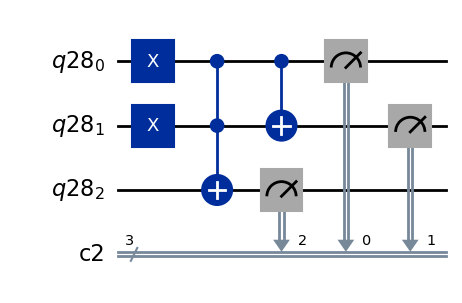

In [29]:
circuit.draw(style="iqp", output="mpl")

In [33]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [34]:
job.job_id()

'cnb1a10hga30008exyw0'

In [ ]:
result = job.result()
counts = result.get_counts()
print(counts)

#If the `job.status()` is ... <JobStatus.QUEUED: 'job is queued'>
# I can't `print(counts)`

In [31]:
job.creation_date()

datetime.datetime(2023, 11, 16, 10, 11, 32, 657001, tzinfo=tzlocal())